In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import geopandas
from ipywidgets import interact, interactive
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
with open("db_school_units.json", "r") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame.from_dict(data)
df.head()

,Namn,Rektorsnamn,Skolenhetskod,Epost,Telefon,Webbadress,Besoksadress,Leveransadress,Utdelningsadress,Inriktningstyp,Skolenhetstyp,SkolaNamn,Skolformer,Kommun,Huvudman,Skolenhet_ValidFrom,Status
0,Nytorpsskolan,Lisa Klang,10017830,nytorpsskolan@surahammar.se,0220-39181,http://www.surahammar.se,"{'Adress': 'Nybyggsvägen 13', 'Postnr': '73535...","{'Adress': 'Nybyggsvägen 13', 'Postnr': '73535...","{'Adress': 'Box 203', 'Postnr': '73523', 'Ort'...",Ej relevant,Skolenhet,None,"[{'Benamning': 'Förskoleklass', 'SkolformKod':...","{'Kommunkod': '1907', 'Namn': 'Surahammar'}","{'PeOrgNr': '2120002031', 'Namn': 'SURAHAMMARS...",2022-08-29T00:00:00,Aktiv
1,SFI,Greta Hidén,10023587,annika.hagsten@hellefors.se,0591-64196,http://www.hellefors.se,"{'Adress': 'klockarvägen 4', 'Postnr': '71234'...","{'Adress': 'Klockarvägen 4', 'Postnr': '71283'...","{'Adress': 'Klockarvägen 4', 'Postnr': '71234'...",Ej relevant,Skolenhet,Pihlskolan,"[{'Benamning': 'SFI', 'SkolformKod': '37', 'Sk...","{'Kommunkod': '1863', 'Namn': 'Hällefors'}","{'PeOrgNr': '2120001942', 'Namn': 'HÄLLEFORS K...",2017-06-09T00:00:00,Aktiv
2,Mimerskolan,Johan Edelsvärd,10023937,mimerskolan@friskola.sundsvall.se,060-661720,http://www.mimerskolan.se,"{'Adress': 'Gaffelbyvägen 1', 'Postnr': '85640...","{'Adress': 'Gaffelbyvägen 1', 'Postnr': '85640...","{'Adress': 'Box 9043', 'Postnr': '85009', 'Ort...",Allmän,Skolenhet,None,"[{'Benamning': 'Fritidshem', 'SkolformKod': '1...","{'Kommunkod': '2281', 'Namn': 'Sundsvall'}","{'PeOrgNr': '8892027965', 'Namn': 'FÖRENINGEN ...",2016-06-13T00:00:00,Aktiv
3,Söderbymalmsskolan,Therese Gärde,10035236,soderbymalmsskolan@haninge.se,08-6068875,http://haninge.se/forskola-och-skola/grundskola/,"{'Adress': 'Marinens väg 30', 'Postnr': '13640...","{'Adress': 'Haninge kommun', 'Postnr': '13681'...","{'Adress': 'Haninge kommun', 'Postnr': '13681'...",Ej relevant,Skolenhet,Söderbymalmsskolan,"[{'Benamning': 'Grundskola', 'SkolformKod': '1...","{'Kommunkod': '0136', 'Namn': 'Haninge'}","{'PeOrgNr': '2120000084', 'Namn': 'HANINGE KOM...",2016-06-16T00:00:00,Aktiv
4,Lärande Grundskola Skapa,Fredrik Plahn,10063280,info@skapaskolan.se,08-41026840,http://www.skapaskolan.se,"{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...","{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...","{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...",Allmän,Skolenhet,None,"[{'Benamning': 'Förskoleklass', 'SkolformKod':...","{'Kommunkod': '0126', 'Namn': 'Huddinge'}","{'PeOrgNr': '5568097405', 'Namn': 'The Learnin...",2022-09-20T00:00:00,Aktiv


In [12]:
def get_type(df):
    huvudman_json = df["Huvudman"]
    return True if huvudman_json["Typ"] == "Kommun" else False
    
df["Public"] = df.apply(lambda x: get_type(x), axis=1)

In [17]:
df["Public"].value_counts()

True     6140
False    1451
Name: Public, dtype: int64

# Geospatial coordinates for schools in 2022

In [22]:
df["Latitude"] = df.apply(lambda x: x["Besoksadress"]["GeoData"]["Koordinat_WGS84_Lat"], axis=1)
df["Longitude"] = df.apply(lambda x: x["Besoksadress"]["GeoData"]["Koordinat_WGS84_Lng"], axis=1)

In [26]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Namn,Rektorsnamn,Skolenhetskod,Epost,Telefon,Webbadress,Besoksadress,Leveransadress,Utdelningsadress,Inriktningstyp,...,Skolformer,Kommun,Huvudman,Skolenhet_ValidFrom,Status,temp,Public,Latitude,Longitude,geometry
0,Nytorpsskolan,Lisa Klang,10017830,nytorpsskolan@surahammar.se,0220-39181,http://www.surahammar.se,"{'Adress': 'Nybyggsvägen 13', 'Postnr': '73535...","{'Adress': 'Nybyggsvägen 13', 'Postnr': '73535...","{'Adress': 'Box 203', 'Postnr': '73523', 'Ort'...",Ej relevant,...,"[{'Benamning': 'Förskoleklass', 'SkolformKod':...","{'Kommunkod': '1907', 'Namn': 'Surahammar'}","{'PeOrgNr': '2120002031', 'Namn': 'SURAHAMMARS...",2022-08-29T00:00:00,Aktiv,NaN,True,59.7144959,16.234334699999976,POINT (16.23433 59.71450)
1,SFI,Greta Hidén,10023587,annika.hagsten@hellefors.se,0591-64196,http://www.hellefors.se,"{'Adress': 'klockarvägen 4', 'Postnr': '71234'...","{'Adress': 'Klockarvägen 4', 'Postnr': '71283'...","{'Adress': 'Klockarvägen 4', 'Postnr': '71234'...",Ej relevant,...,"[{'Benamning': 'SFI', 'SkolformKod': '37', 'Sk...","{'Kommunkod': '1863', 'Namn': 'Hällefors'}","{'PeOrgNr': '2120001942', 'Namn': 'HÄLLEFORS K...",2017-06-09T00:00:00,Aktiv,NaN,True,59.78488069999999,14.520467800000006,POINT (14.52047 59.78488)
2,Mimerskolan,Johan Edelsvärd,10023937,mimerskolan@friskola.sundsvall.se,060-661720,http://www.mimerskolan.se,"{'Adress': 'Gaffelbyvägen 1', 'Postnr': '85640...","{'Adress': 'Gaffelbyvägen 1', 'Postnr': '85640...","{'Adress': 'Box 9043', 'Postnr': '85009', 'Ort...",Allmän,...,"[{'Benamning': 'Fritidshem', 'SkolformKod': '1...","{'Kommunkod': '2281', 'Namn': 'Sundsvall'}","{'PeOrgNr': '8892027965', 'Namn': 'FÖRENINGEN ...",2016-06-13T00:00:00,Aktiv,NaN,False,62.40158209835067,17.315876431213383,POINT (17.31588 62.40158)
3,Söderbymalmsskolan,Therese Gärde,10035236,soderbymalmsskolan@haninge.se,08-6068875,http://haninge.se/forskola-och-skola/grundskola/,"{'Adress': 'Marinens väg 30', 'Postnr': '13640...","{'Adress': 'Haninge kommun', 'Postnr': '13681'...","{'Adress': 'Haninge kommun', 'Postnr': '13681'...",Ej relevant,...,"[{'Benamning': 'Grundskola', 'SkolformKod': '1...","{'Kommunkod': '0136', 'Namn': 'Haninge'}","{'PeOrgNr': '2120000084', 'Namn': 'HANINGE KOM...",2016-06-16T00:00:00,Aktiv,NaN,True,59.16286545184274,18.134313905557242,POINT (18.13431 59.16287)
4,Lärande Grundskola Skapa,Fredrik Plahn,10063280,info@skapaskolan.se,08-41026840,http://www.skapaskolan.se,"{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...","{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...","{'Adress': 'Sommarsolsvägen 9', 'Postnr': '141...",Allmän,...,"[{'Benamning': 'Förskoleklass', 'SkolformKod':...","{'Kommunkod': '0126', 'Namn': 'Huddinge'}","{'PeOrgNr': '5568097405', 'Namn': 'The Learnin...",2022-09-20T00:00:00,Aktiv,NaN,False,59.23365323139547,17.96041262232052,POINT (17.96041 59.23365)


In [51]:
def plot_geo_data(school_type):
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    ax = world[world.name == 'Sweden'].plot(color='white', edgecolor='black')
    
    if school_type != "All":
        is_public = True if school_type == "Public" else False
        gdf.loc[gdf["Public"] == is_public].plot(ax=ax, color='red', markersize=0.01)
    else:
        gdf.plot(ax=ax, color='red', markersize=0.01)
    
    ax.set_title(f"Geographic coordinates for {school_type} schools")
    plt.show()
    
school_types = ["All", "Private", "Public"]
interact(plot_geo_data, school_type=school_types)

interactive(children=(Dropdown(description='school_type', options=('All', 'Private', 'Public'), value='All'), …

<function __main__.plot_geo_data(school_type)>

# Ratio between private and public schools over time

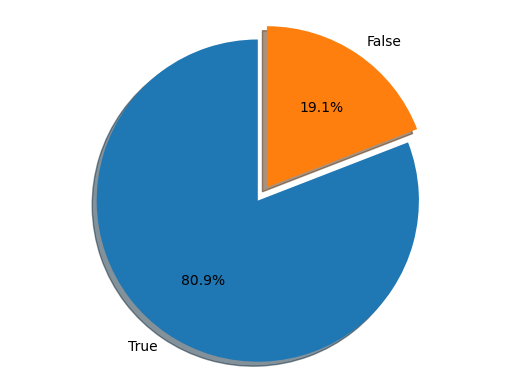

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Public"].value_counts().values, explode=[0, 0.1], labels=df["Public"].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()